In [1]:
#import pandas
import pandas as pd
col_names =  ['bus_age', 'maintenance cost']

#load dataset
cand = pd.read_csv("exam_lods.csv", header=None, names=col_names)
cand.head(5)

,bus_age,maintenance cost
0,1,350
1,2,370
2,2,480
3,2,520
4,2,590


In [2]:
feature_cols = ['bus_age','maintenance cost']
X = cand[feature_cols]#[:-1]] #features
y = cand['bus_age'] #target variable

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=16)

In [8]:
from sklearn.linear_model import LogisticRegression

#instantiate model using default params
logreg = LogisticRegression(random_state=16, max_iter=1000) #code gives error w/o max iteration set
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(solver='liblinear', penalty='l1')

model.fit(X_train_vec, y_train)
pred = model.predict(X_test_vec)
accuracy_score(y_test,pred)


ValueError: Found input variables with inconsistent numbers of samples: [2, 7]

In [ ]:
from sklearn import metrics

#confusion matrix initialization
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) #this is admission as we're finding people who got admitted
cnf_matrix

NameError: name 'cnf_matrix' is not defined

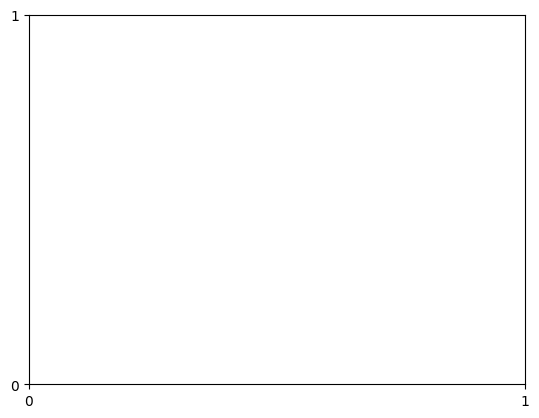

In [6]:

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            xticklabels=['Admitted', 'Not Admitted'],
            yticklabels=['Admitted', 'Not Admitted'])

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')



In [7]:

from sklearn.metrics import classification_report
target_names = ['is_smishing', 'char_count']
print(classification_report(y_test, y_pred, target_names=target_names))

#confusion matrix results from previous cell
tp = 5
fn = 2
tn = 0
fp = 3

#calculations
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("Accuracy:", accuracy, "Precision:", precision,"Recall:", recall)


ValueError: Number of classes, 3, does not match size of target_names, 2. Try specifying the labels parameter

In [ ]:
#df =  ['gmat','gpa', 'work_experience']


#load dataset
#cand = pd.read_csv("candidates1.csv", header=None, names=df)
#cand.head(5)

#data_predictions = logreg.predict(cand)

#cand['predicted_admission'] = data_predictions

#print(cand[['gmat','gpa','work_experience','predicted_admission']])



In [ ]:
#just incase i need to use ROC curve

#y_pred_proba = logreg.predict_proba(X_test)[::,1]
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#auc = metrics.roc_auc_score(y_test, y_pred_proba)
#plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#plt.legend(loc=4)
#plt.show()